#  Import required libraries and set parameters

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (512, 512)
batch_size = 16

train_dir = r'D:\sickle_cell_dataset\train'
val_dir = r'D:\sickle_cell_dataset\val'
test_dir = r'D:\sickle_cell_dataset\test'


# data generators

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary'
)
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='binary'
)


Found 553 images belonging to 2 classes.
Found 214 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


#  Define the CNN model

In [14]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(512, 512, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


# Compile the model

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [16]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 510, 510, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 253, 253, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 124, 124, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 492032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      62,980,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,073,601 (240.61 MB)

 Trainable params: 63,073,601 (240.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (512, 512)
batch_size = 16

train_dir = r'D:\sickle_cell_dataset\train'
val_dir = r'D:\sickle_cell_dataset\val'

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, zoom_range=0.1, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')


Found 553 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


In [42]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)


Epoch 1/15


NotImplementedError: numpy() is only available when eager execution is enabled.

# Evaluate on test data

In [19]:
test_dir = r'D:\sickle_cell_dataset\test'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Found 215 images belonging to 2 classes.
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 475ms/step - accuracy: 0.9956 - loss: 0.0579
Test Accuracy: 0.9953
Test Loss: 0.0568


## Metric	Value	Meaning
Accuracy	99.53%	Very high – excellent prediction quality
Loss	    0.0568	Very low  – predictions are reliable


##  Plot Accuracy & Loss Graphs

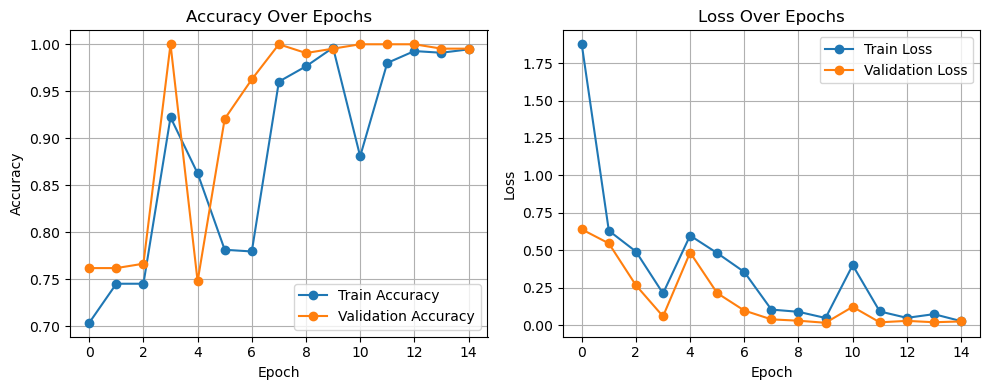

In [20]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Save Trained Model

In [21]:
# Save the model
model.save('sickle_cell_model.h5')
print("Model saved successfully!")


Model saved successfully!


# Load the Model Later

In [22]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('sickle_cell_model.h5')
print("Model loaded successfully!")


Model loaded successfully!


# Make Predictions on New Images

In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your test image
img_path = r'D:\archive\Positive\labelled\20.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(512, 512))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict using the trained model
prediction = model.predict(img_array)

# Output result
if prediction[0][0] > 0.5:
    print("Predicted: Positive (Sickled Cell)")
else:
    print("Predicted: Negative (Normal Cell)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Predicted: Positive (Sickled Cell)


In [45]:
model.save('sickle_cell_model.keras')
print("Model saved successfully!")


Model saved successfully!
